In this labwork, you will learn how to open the netcdf file and plot the multidimensional data.

In [ ]:
# !pip install netCDF4
# !pip install basemap

#---------------------------
# EX1: draw a map of Vietnam
#---------------------------
Draw two maps of Vietnam. The first map contains only the borderline. The second map contains both the borderline and the border of 63 provinces of Vietnam.

![](https://i.imgur.com/aU9UOlp.png)

#---------------------------

In [2]:
#####################
# EX1
#####################
# Nhớ plot cả đảo nha các em

#import library
from numpy import *
from netCDF4 import *

import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib.colors import BoundaryNorm



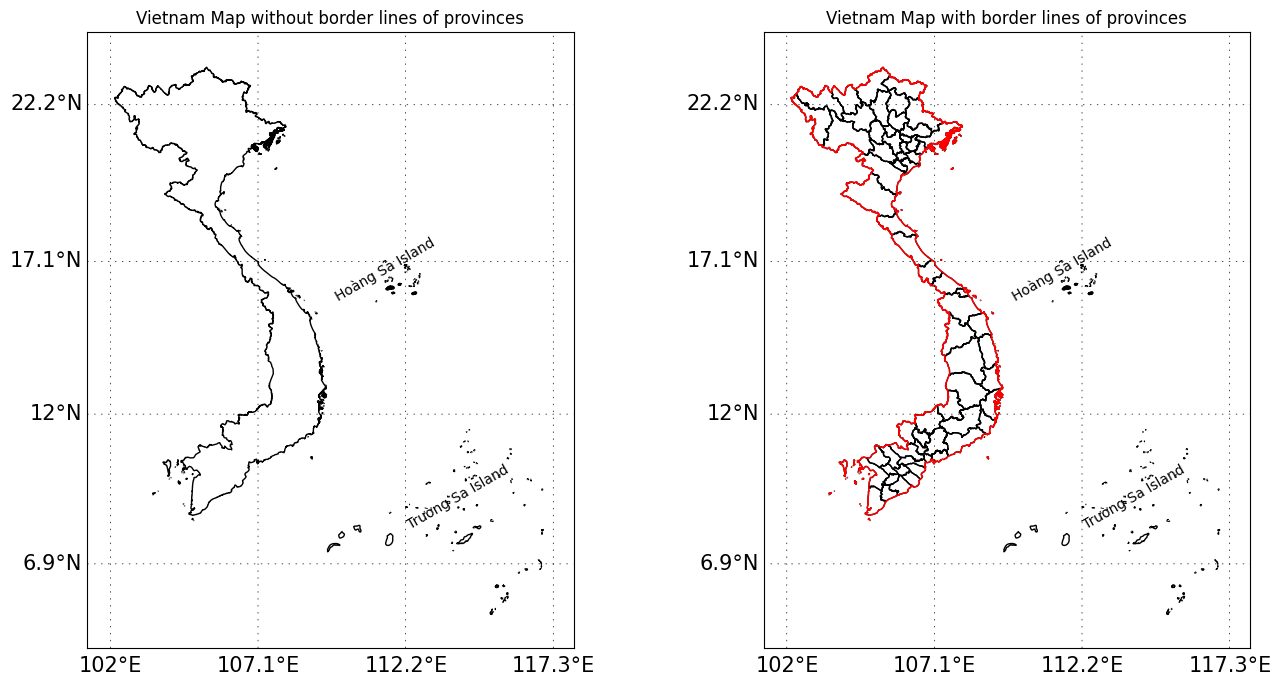

In [3]:
#now, create a map
fig, ax = plt.subplots(1, 2,figsize=(16,8))

#basemap setting
lon_min = 101.2
lon_max = 118
lat_min = 4
lat_max = 24.5

# Vn map without continents 
map1 = Basemap(projection='merc',llcrnrlon=lon_min,llcrnrlat=lat_min,
    urcrnrlon=lon_max,urcrnrlat=lat_max,resolution='i',ax = ax[0])

#Read File 0
map1.readshapefile('gadm41_VNM/gadm41_VNM_0', 'gadm41_VNM_0', linewidth=1, color='black')
map1.readshapefile('haidao/haidao', 'haidao', linewidth=1, color="black")

#draw the lat and lon
parallels = arange(-90.,150, around((lat_max-lat_min)/4, decimals=1)) 	#lat
meridians = arange(0.,180., around((lat_max-lat_min)/4, decimals=1))
map1.drawparallels(parallels,linewidth=0.5,dashes=[2,8],labels=[1,0,0,0],fontsize=15, zorder=12) # left, right, top or bottom
map1.drawmeridians(meridians,linewidth=0.5,dashes=[2,8],labels=[0,0,0,1],fontsize=15, zorder=12)



# VN full continents
map2 = Basemap(projection='merc',llcrnrlon=lon_min,llcrnrlat=lat_min,
    urcrnrlon=lon_max,urcrnrlat=lat_max,resolution='i',ax = ax[1])

# Read FIle 1
map2.readshapefile('gadm41_VNM/gadm41_VNM_1', 'gadm41_VNM_1', linewidth=1, color='black')
map2.readshapefile('gadm41_VNM/gadm41_VNM_0', 'gadm41_VNM_0', linewidth=1, color='red')
map2.readshapefile('haidao/haidao', 'haidao', linewidth=1, color="black")

#draw the lat and lon
map2.drawparallels(parallels,linewidth=0.5,dashes=[2,8],labels=[1,0,0,0],fontsize=15, zorder=12) # left, right, top or bottom
map2.drawmeridians(meridians,linewidth=0.5,dashes=[2,8],labels=[0,0,0,1],fontsize=15, zorder=12)

# Convert longitude and latitude to map projection coordinates for both maps
x1, y1 = map1(111.5, 15.7)  # Coordinates for Hoàng Sa Island
x2, y2 = map1(114, 8)       # Coordinates for Trường Sa Island

x1_map2, y1_map2 = map2(111.5, 15.7)  # Coordinates for Hoàng Sa Island on map2
x2_map2, y2_map2 = map2(114, 8)       # Coordinates for Trường Sa Island on map2

# Add text using the converted coordinates
ax[0].text(x1, y1, 'Hoàng Sa Island', fontsize=10, ha='center', va='bottom', rotation=30, color='k')
ax[0].text(x2, y2, 'Trường Sa Island', fontsize=10, ha='center', va='bottom', rotation=30, color='k')

ax[1].text(x1_map2, y1_map2, 'Hoàng Sa Island', fontsize=10, ha='center', va='bottom', rotation=30, color='k')
ax[1].text(x2_map2, y2_map2, 'Trường Sa Island', fontsize=10, ha='center', va='bottom', rotation=30, color='k')

# Set titles
ax[0].title.set_text('Vietnam Map without border lines of provinces')
ax[1].title.set_text('Vietnam Map with border lines of provinces')

plt.show()



#---------------------------
# EX2: work with netcdf data
#---------------------------
Download the file from the labwork.
Load the file. Read the variable 'T2'

Print the shape of data, shape of lat and lon
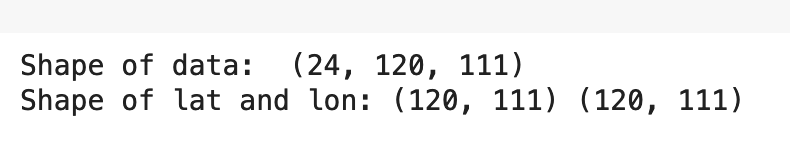
#---------------------------

In [4]:
#####################
# EX2
#####################
nc_path = 'wrfout_d02_2019-11-12_sample.nc'
nc_file  = Dataset(nc_path,'r')

#print the variables inside the file
for name in nc_file.variables.keys():
    if (name not in nc_file.dimensions.keys()):
       data = nc_file.variables[name]
       print(name, '\t',data.units, '\t\t',data.shape, '\t',data.dtype, '\t',data.dimensions)

data = squeeze(nc_file.variables['T2'][:])
print ('\nShape of data: ', data.shape)

#read the lon and lat coresponding to the data
lat = squeeze(nc_file.variables['XLAT'][:])
lon = squeeze(nc_file.variables['XLONG'][:])
print ('Shape of lat and lon:', lat.shape, lon.shape)



XLONG 	 degree_east 		 (120, 111) 	 float32 	 ('south_north', 'west_east')
XLAT 	 degree_north 		 (120, 111) 	 float32 	 ('south_north', 'west_east')
Q2 	 kg kg-1 		 (24, 120, 111) 	 float32 	 ('XTIME', 'south_north', 'west_east')
T2 	 K 		 (24, 120, 111) 	 float32 	 ('XTIME', 'south_north', 'west_east')
PSFC 	 Pa 		 (24, 120, 111) 	 float32 	 ('XTIME', 'south_north', 'west_east')
U10 	 m s-1 		 (24, 120, 111) 	 float32 	 ('XTIME', 'south_north', 'west_east')
V10 	 m s-1 		 (24, 120, 111) 	 float32 	 ('XTIME', 'south_north', 'west_east')
RAINNC 	 mm 		 (24, 120, 111) 	 float32 	 ('XTIME', 'south_north', 'west_east')

Shape of data:  (24, 120, 111)
Shape of lat and lon: (120, 111) (120, 111)


#---------------------------
# EX3: work with netcf data (continue)
#---------------------------

Draw 3 maps of temperature, at [0,6,12] hour.
Use 1 colorbar for 3 subplot.
The height of the colorbar is adjusted within the limit of 19.9N - 22.0N
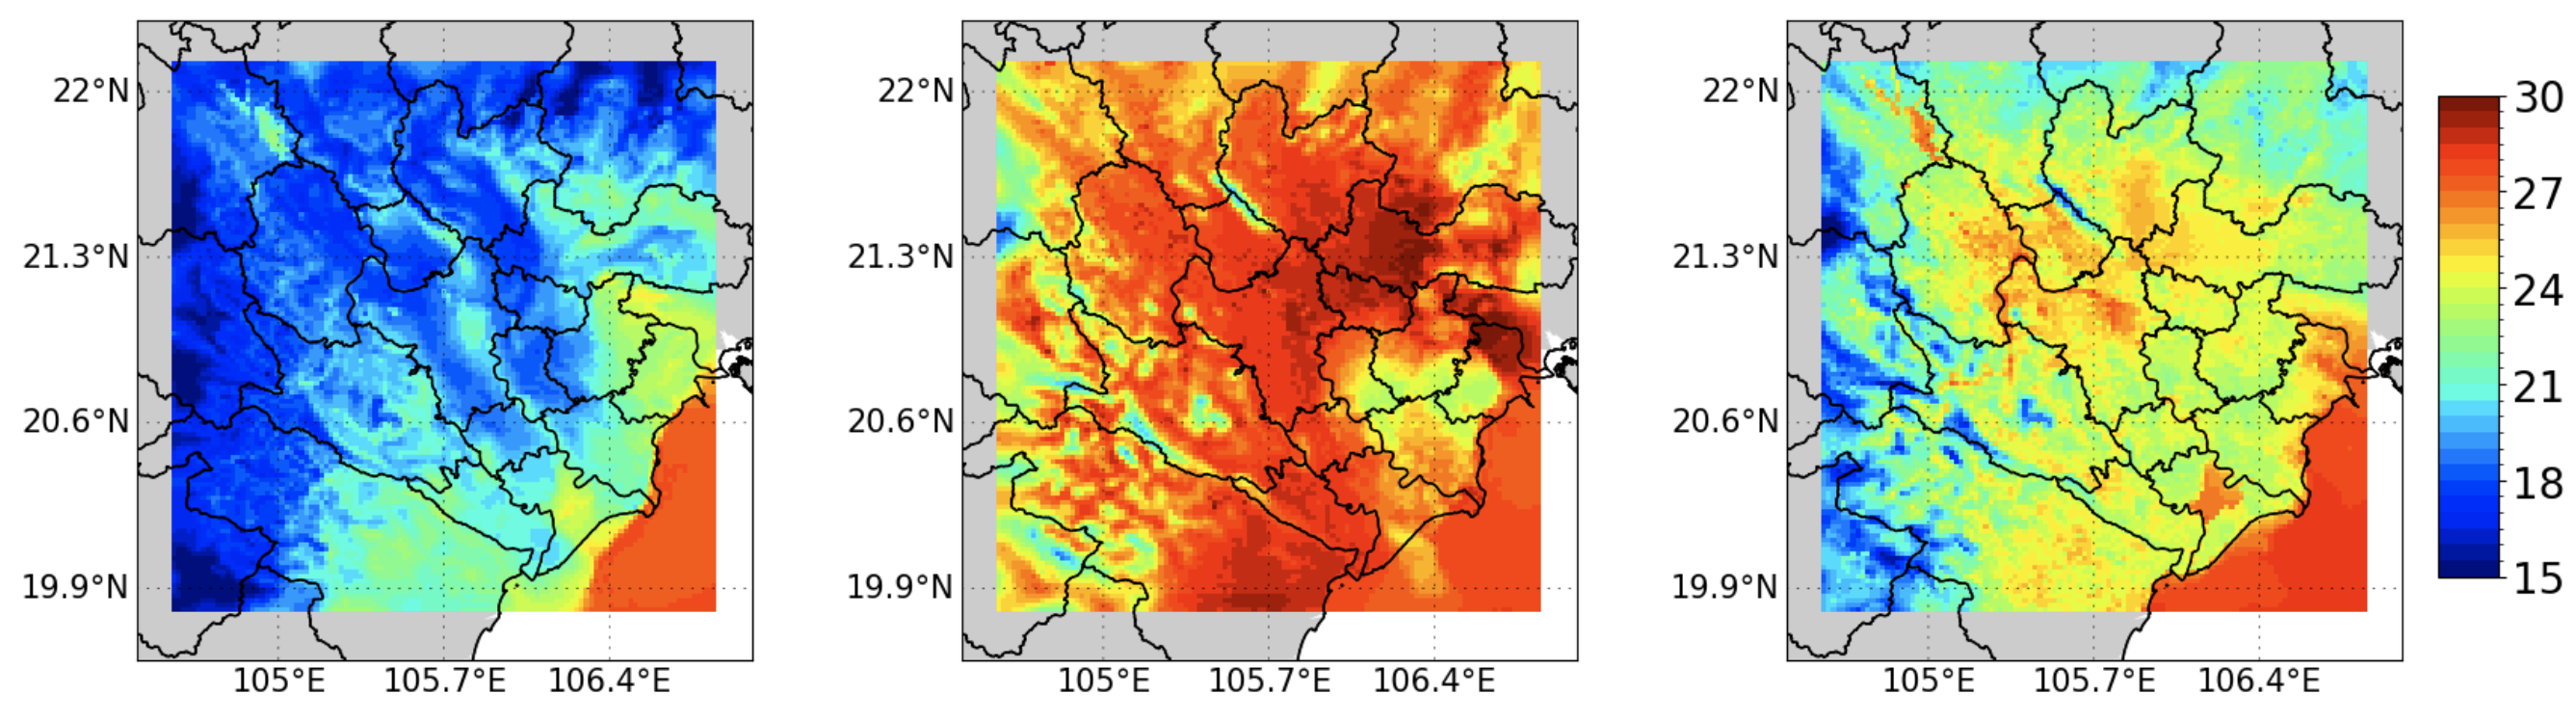

#---------------------------

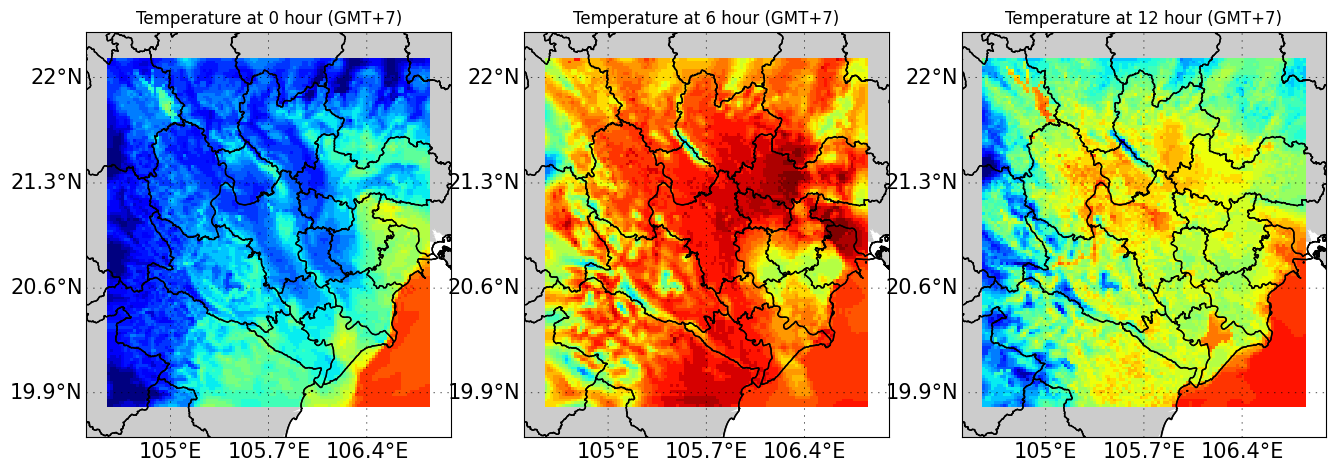

In [5]:
#####################
# EX3
#####################
fig, ax = plt.subplots(1, 3, figsize=(16, 8))

#basemap setting
lon_min = 104.4
lon_max = 107
lat_min = 19.6
lat_max = 22.3


# map1
map1 = Basemap(projection='merc',llcrnrlon=lon_min,llcrnrlat=lat_min,
    urcrnrlon=lon_max,urcrnrlat=lat_max,resolution='i',ax = ax[0])

#Read File 1
map1.readshapefile('gadm41_VNM/gadm41_VNM_0', 'gadm41_VNM_0', linewidth=1, color='black')
map1.readshapefile('gadm41_VNM/gadm41_VNM_1', 'gadm41_VNM_1', linewidth=1, color='black')


# # map2
map2 = Basemap(projection='merc',llcrnrlon=lon_min,llcrnrlat=lat_min,
    urcrnrlon=lon_max,urcrnrlat=lat_max,resolution='i',ax = ax[1])

#Read File 2
map2.readshapefile('gadm41_VNM/gadm41_VNM_0', 'gadm41_VNM_0', linewidth=1, color='black')
map2.readshapefile('gadm41_VNM/gadm41_VNM_1', 'gadm41_VNM_1', linewidth=1, color='black')

# # map3
map3 = Basemap(projection='merc',llcrnrlon=lon_min,llcrnrlat=lat_min,
    urcrnrlon=lon_max,urcrnrlat=lat_max,resolution='i',ax = ax[2])

#Read File 3
map3.readshapefile('gadm41_VNM/gadm41_VNM_0', 'gadm41_VNM_0', linewidth=1, color='black')
map3.readshapefile('gadm41_VNM/gadm41_VNM_1', 'gadm41_VNM_1', linewidth=1, color='black')

map1.fillcontinents(zorder=0)
map2.fillcontinents(zorder=0)
map3.fillcontinents(zorder=0)

#draw the lat and lon
parallels = arange(-90.,150, around((lat_max-lat_min)/4, decimals=1)) 	#lat
meridians = arange(0.,180., around((lat_max-lat_min)/4, decimals=1))
map1.drawparallels(parallels,linewidth=0.5,dashes=[2,8],labels=[1,0,0,0],fontsize=15, zorder=12) # left, right, top or bottom
map1.drawmeridians(meridians,linewidth=0.5,dashes=[2,8],labels=[0,0,0,1],fontsize=15, zorder=12)
map2.drawparallels(parallels,linewidth=0.5,dashes=[2,8],labels=[1,0,0,0],fontsize=15, zorder=12) # left, right, top or bottom
map2.drawmeridians(meridians,linewidth=0.5,dashes=[2,8],labels=[0,0,0,1],fontsize=15, zorder=12)
map3.drawparallels(parallels,linewidth=0.5,dashes=[2,8],labels=[1,0,0,0],fontsize=15, zorder=12) # left, right, top or bottom
map3.drawmeridians(meridians,linewidth=0.5,dashes=[2,8],labels=[0,0,0,1],fontsize=15, zorder=12)

# Add title of center figure
ax[0].title.set_text('Temperature at 0 hour (GMT+7)')
ax[1].title.set_text('Temperature at 6 hour (GMT+7)')
ax[2].title.set_text('Temperature at 12 hour (GMT+7)')


levels = linspace(15, 30, 30, endpoint=True)
color_map = plt.get_cmap('jet')
color_map.set_bad(color='white')
#FOR NORMAL SCALE
norm = BoundaryNorm(levels , ncolors=color_map.N, clip=False)

#pcolormesh
lon_map, lat_map = map1(lon, lat)

cm_1 = map1.pcolormesh( lon_map  , lat_map , data[0,:,:]-273.15,norm = norm,cmap='jet')

#pcolormesh
lon_map, lat_map = map2(lon, lat)

cm_2 = map2.pcolormesh( lon_map  , lat_map , data[6,:,:]-273.15,norm = norm,cmap='jet')

#pcolormesh
lon_map, lat_map = map3(lon, lat)

cm_3 = map3.pcolormesh( lon_map  , lat_map , data[12,:,:]-273.15,norm = norm,cmap='jet')

plt.show()


#---------------------------
# EX4: same as above but now with three colorbars, with different color range
#---------------------------

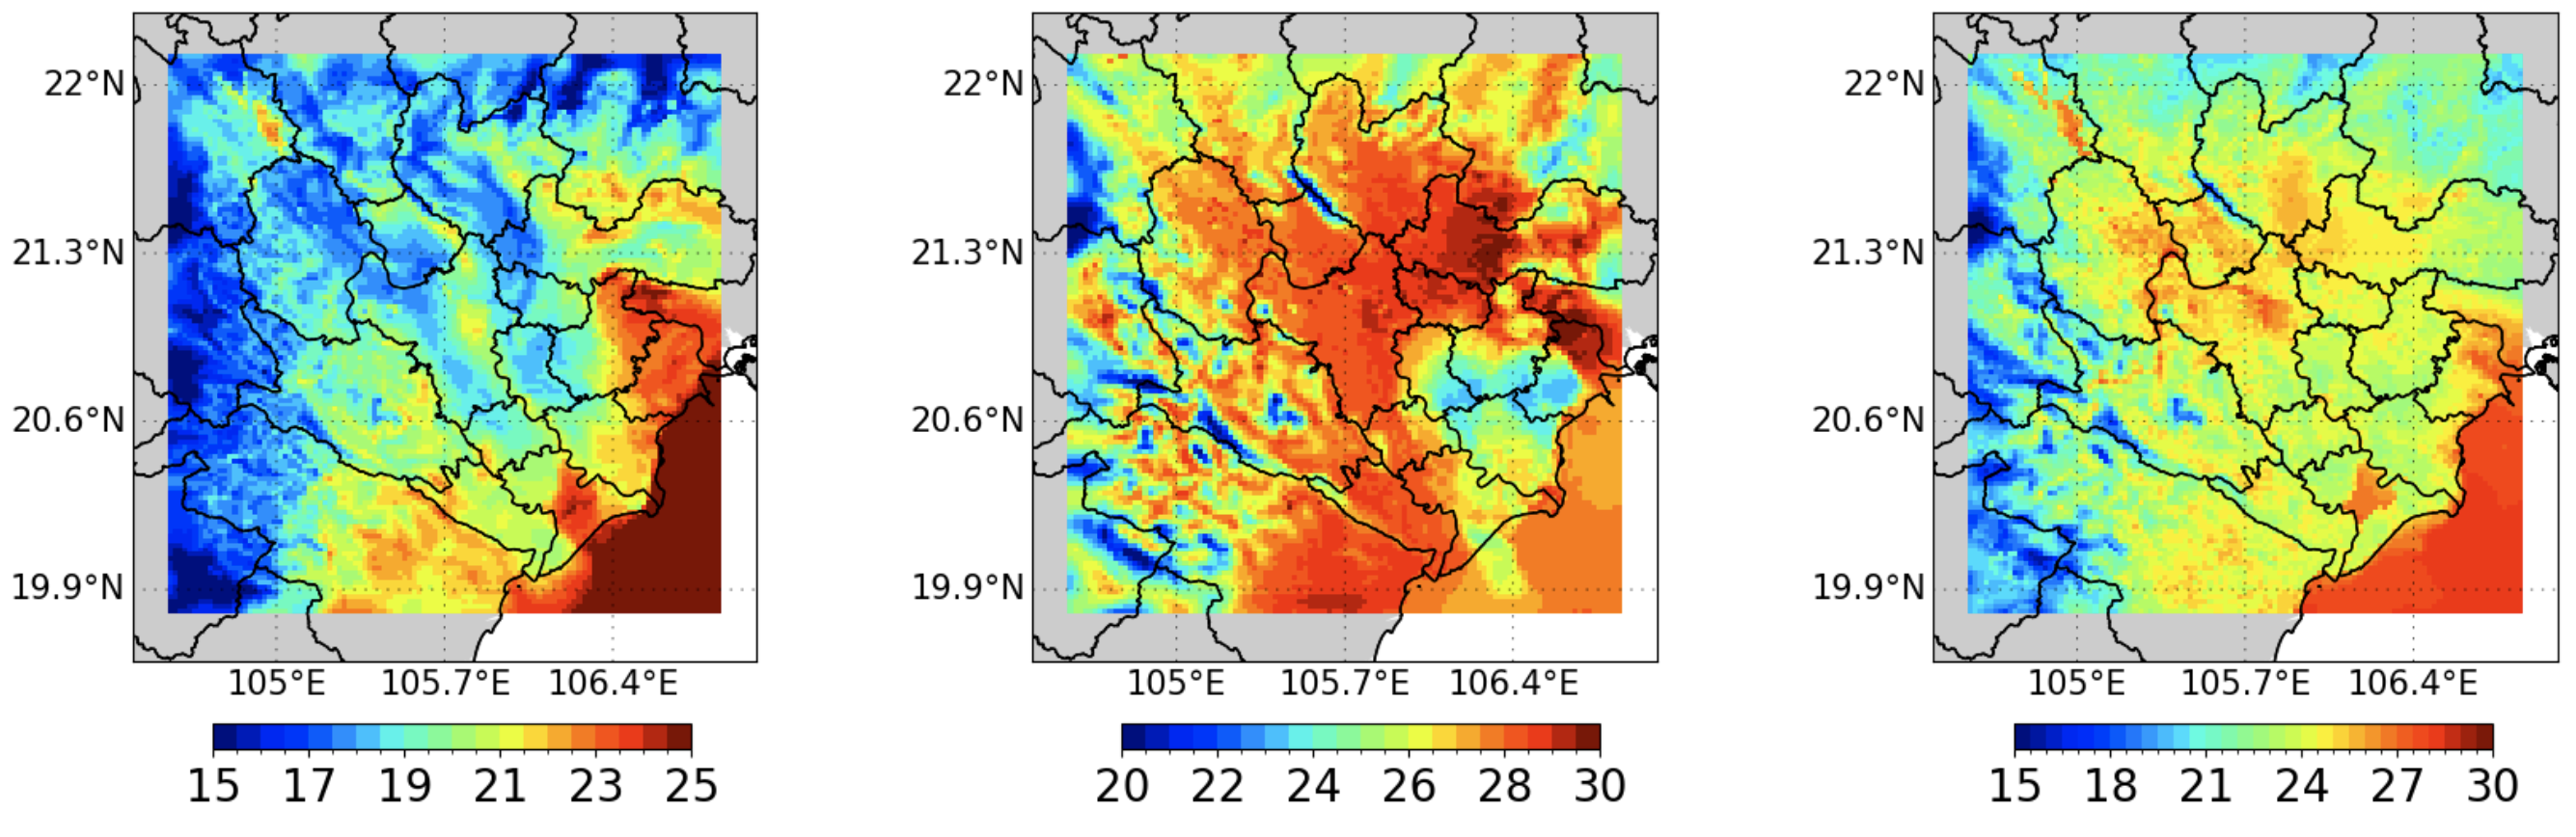

#---------------------------

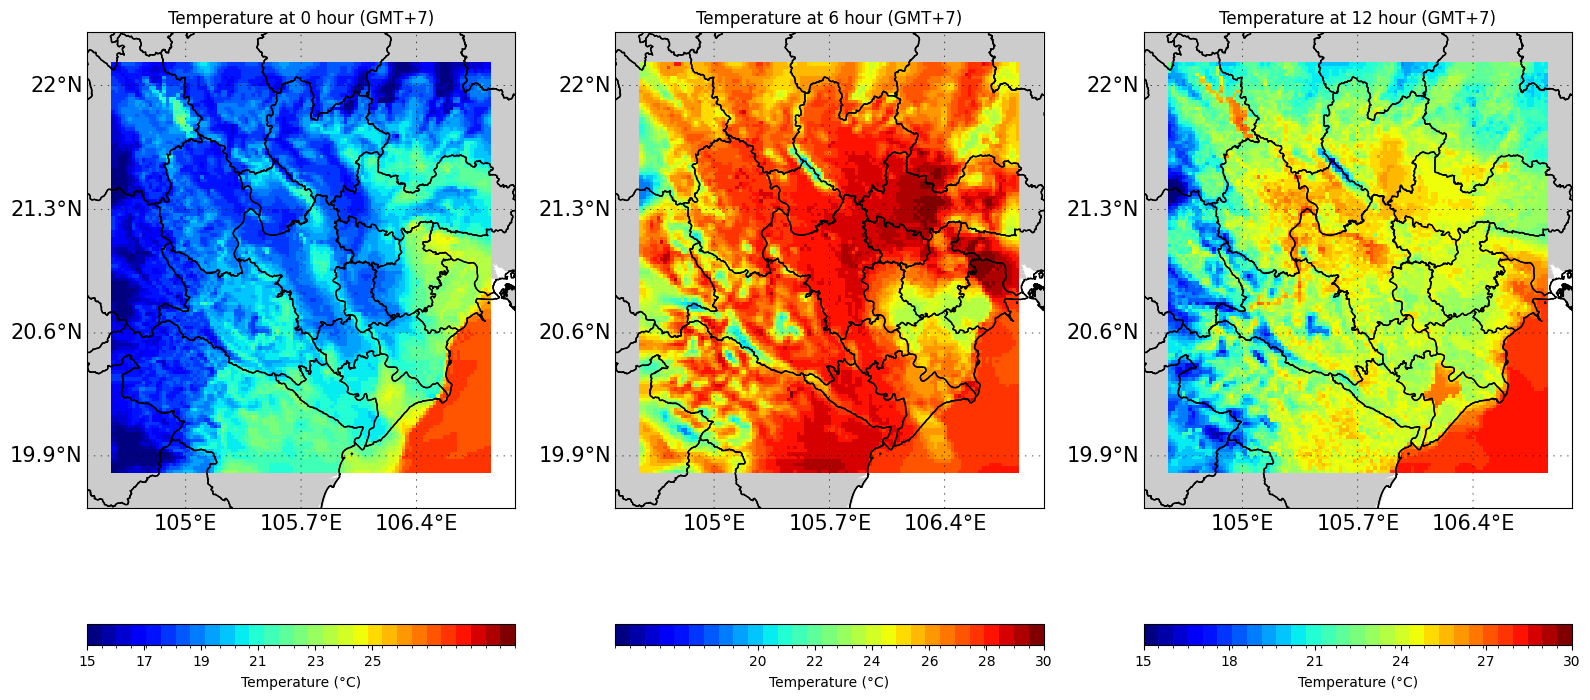

<Figure size 640x480 with 0 Axes>

In [6]:
#####################
# EX4
#####################
import matplotlib as mpl
import numpy as np
fig, ax = plt.subplots(1, 3, figsize=(16, 8))

#basemap setting
lon_min = 104.4
lon_max = 107
lat_min = 19.6
lat_max = 22.3


# map1
map1 = Basemap(projection='merc',llcrnrlon=lon_min,llcrnrlat=lat_min,
    urcrnrlon=lon_max,urcrnrlat=lat_max,resolution='i',ax = ax[0])

#Read File 1
map1.readshapefile('gadm41_VNM/gadm41_VNM_0', 'gadm41_VNM_0', linewidth=1, color='black')
map1.readshapefile('gadm41_VNM/gadm41_VNM_1', 'gadm41_VNM_1', linewidth=1, color='black')


# map2
map2 = Basemap(projection='merc',llcrnrlon=lon_min,llcrnrlat=lat_min,
    urcrnrlon=lon_max,urcrnrlat=lat_max,resolution='i',ax = ax[1])

#Read File 2
map2.readshapefile('gadm41_VNM/gadm41_VNM_0', 'gadm41_VNM_0', linewidth=1, color='black')
map2.readshapefile('gadm41_VNM/gadm41_VNM_1', 'gadm41_VNM_1', linewidth=1, color='black')

# map3
map3 = Basemap(projection='merc',llcrnrlon=lon_min,llcrnrlat=lat_min,
    urcrnrlon=lon_max,urcrnrlat=lat_max,resolution='i',ax = ax[2])

#Read File 3
map3.readshapefile('gadm41_VNM/gadm41_VNM_0', 'gadm41_VNM_0', linewidth=1, color='black')
map3.readshapefile('gadm41_VNM/gadm41_VNM_1', 'gadm41_VNM_1', linewidth=1, color='black')

map1.fillcontinents(zorder=0)
map2.fillcontinents(zorder=0)
map3.fillcontinents(zorder=0)

#draw the lat and lon
parallels = arange(-90.,150, around((lat_max-lat_min)/4, decimals=1)) 	#lat
meridians = arange(0.,180., around((lat_max-lat_min)/4, decimals=1))
map1.drawparallels(parallels,linewidth=0.5,dashes=[2,8],labels=[1,0,0,0],fontsize=15, zorder=12) # left, right, top or bottom
map1.drawmeridians(meridians,linewidth=0.5,dashes=[2,8],labels=[0,0,0,1],fontsize=15, zorder=12)
map2.drawparallels(parallels,linewidth=0.5,dashes=[2,8],labels=[1,0,0,0],fontsize=15, zorder=12) # left, right, top or bottom
map2.drawmeridians(meridians,linewidth=0.5,dashes=[2,8],labels=[0,0,0,1],fontsize=15, zorder=12)
map3.drawparallels(parallels,linewidth=0.5,dashes=[2,8],labels=[1,0,0,0],fontsize=15, zorder=12) # left, right, top or bottom
map3.drawmeridians(meridians,linewidth=0.5,dashes=[2,8],labels=[0,0,0,1],fontsize=15, zorder=12)

# Add title of center figure
ax[0].title.set_text('Temperature at 0 hour (GMT+7)')
ax[1].title.set_text('Temperature at 6 hour (GMT+7)')
ax[2].title.set_text('Temperature at 12 hour (GMT+7)')


levels = linspace(15, 30, 30, endpoint=True)
color_map = plt.get_cmap('jet')
color_map.set_bad(color='white')
#FOR NORMAL SCALE
norm = BoundaryNorm(levels , ncolors=color_map.N, clip=False)

#pcolormesh
lon_map, lat_map = map1(lon, lat)

cm_1 = map1.pcolormesh( lon_map  , lat_map , data[0,:,:]-273.15,norm = norm,cmap='jet')

#pcolormesh
lon_map, lat_map = map2(lon, lat)

cm_2 = map2.pcolormesh( lon_map  , lat_map , data[6,:,:]-273.15,norm = norm,cmap='jet')

#pcolormesh
lon_map, lat_map = map3(lon, lat)

cm_3 = map3.pcolormesh( lon_map  , lat_map , data[12,:,:]-273.15,norm = norm,cmap='jet')

# Define color bar levels for each map
cbar_levels_map1 = [15, 17, 19, 21, 23, 25]
cbar_levels_map2 = [20, 22, 24, 26, 28, 30]
cbar_levels_map3 = [15, 18, 21, 24, 27, 30]

# Create color bars for each map
cbar1 = plt.colorbar(cm_1, ax=ax[0], orientation='horizontal', ticks=cbar_levels_map1)
cbar1.set_label('Temperature (°C)', rotation=0, labelpad=5)
cbar1.ax.set_xticklabels(cbar_levels_map1)

cbar2 = plt.colorbar(cm_2, ax=ax[1], orientation='horizontal', ticks=cbar_levels_map2)
cbar2.set_label('Temperature (°C)', rotation=0, labelpad=5)
cbar2.ax.set_xticklabels(cbar_levels_map2)

cbar3 = plt.colorbar(cm_3, ax=ax[2], orientation='horizontal', ticks=cbar_levels_map3)
cbar3.set_label('Temperature (°C)', rotation=0, labelpad=5)
cbar3.ax.set_xticklabels(cbar_levels_map3)

# Show the plot
plt.tight_layout()
plt.show()
# Show the plot
plt.tight_layout()
plt.show()




C:\Users\dangq\AppData\Local\Temp\ipykernel_24396\343922468.py:76: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


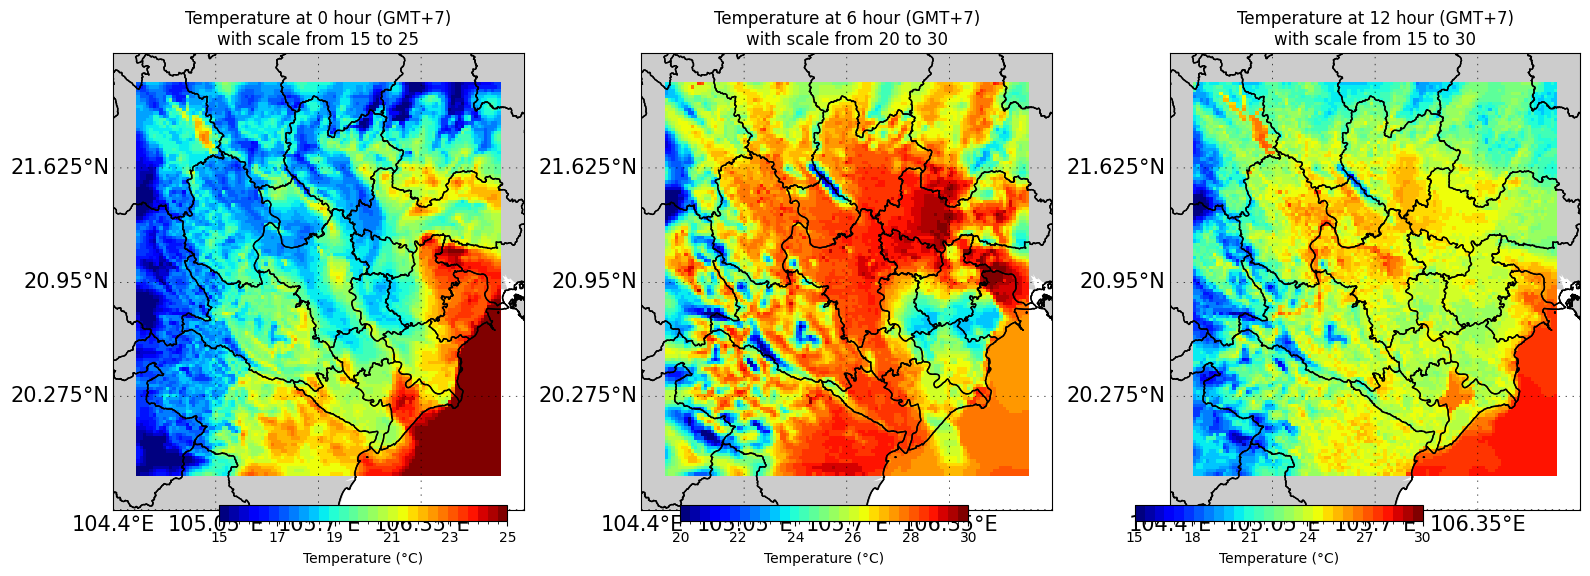

In [7]:
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib.colors import BoundaryNorm

fig, ax = plt.subplots(1, 3, figsize=(16, 8))

# Basemap settings
lon_min = 104.4
lon_max = 107
lat_min = 19.6
lat_max = 22.3

map_1 = Basemap(projection='merc', llcrnrlon=lon_min, llcrnrlat=lat_min,
    urcrnrlon=lon_max, urcrnrlat=lat_max, resolution='i', ax=ax[0])

map_2 = Basemap(projection='merc', llcrnrlon=lon_min, llcrnrlat=lat_min,
    urcrnrlon=lon_max, urcrnrlat=lat_max, resolution='i', ax=ax[1])

map_3 = Basemap(projection='merc', llcrnrlon=lon_min, llcrnrlat=lat_min,
    urcrnrlon=lon_max, urcrnrlat=lat_max, resolution='i', ax=ax[2])

# Fill continents and read shapefiles
for map_instance in [map_1, map_2, map_3]:
    map_instance.fillcontinents(zorder=0)
    map_instance.readshapefile('gadm41_VNM/gadm41_VNM_0', 'gadm41_VNM_0', linewidth=1, color='black')
    map_instance.readshapefile('gadm41_VNM/gadm41_VNM_1', 'gadm41_VNM_1', linewidth=1, color='black')

# Draw latitudes and longitudes
parallels = np.arange(lat_min, lat_max, (lat_max - lat_min) / 4)
meridians = np.arange(lon_min, lon_max, (lon_max - lon_min) / 4)

for map_instance in [map_1, map_2, map_3]:
    map_instance.drawparallels(parallels, linewidth=0.5, dashes=[2, 8], labels=[1, 0, 0, 0], fontsize=15, zorder=12)
    map_instance.drawmeridians(meridians, linewidth=0.5, dashes=[2, 8], labels=[0, 0, 0, 1], fontsize=15, zorder=12)

# Define temperature ranges and normalization
levels_1 = np.linspace(15, 25, 30, endpoint=True)
levels_2 = np.linspace(20, 30, 30, endpoint=True)
levels_3 = np.linspace(15, 30, 30, endpoint=True)
color_map = plt.get_cmap('jet')
color_map.set_bad(color='white')

norm_1 = BoundaryNorm(levels_1, ncolors=color_map.N, clip=False)
norm_2 = BoundaryNorm(levels_2, ncolors=color_map.N, clip=False)
norm_3 = BoundaryNorm(levels_3, ncolors=color_map.N, clip=False)

# pcolormesh for each map
data_values = [data[0, :, :] - 273.15, data[6, :, :] - 273.15, data[12, :, :] - 273.15]  # Ensure 'data' is defined

cm_1 = map_1.pcolormesh(lon_map, lat_map, data_values[0], norm=norm_1, cmap=color_map)
cm_2 = map_2.pcolormesh(lon_map, lat_map, data_values[1], norm=norm_2, cmap=color_map)
cm_3 = map_3.pcolormesh(lon_map, lat_map, data_values[2], norm=norm_3, cmap=color_map)

# Create color bars
cbar_ax1 = fig.add_axes([0.14, 0.2, 0.18, 0.02])  # Adjust positions as needed
cbar_ax2 = fig.add_axes([0.428, 0.2, 0.18, 0.02])
cbar_ax3 = fig.add_axes([0.712, 0.2, 0.18, 0.02])

cbar1 = plt.colorbar(cm_1, cax=cbar_ax1, orientation='horizontal', ticks=np.linspace(15, 25, 6))
cbar1.set_label('Temperature (°C)', rotation=0, labelpad=5)

cbar2 = plt.colorbar(cm_2, cax=cbar_ax2, orientation='horizontal', ticks=np.linspace(20, 30, 6))
cbar2.set_label('Temperature (°C)', rotation=0, labelpad=5)

cbar3 = plt.colorbar(cm_3, cax=cbar_ax3, orientation='horizontal', ticks=np.linspace(15, 30, 6))
cbar3.set_label('Temperature (°C)', rotation=0, labelpad=5)

# Add titles to each plot
ax[0].title.set_text('Temperature at 0 hour (GMT+7)\nwith scale from 15 to 25')
ax[1].title.set_text('Temperature at 6 hour (GMT+7)\nwith scale from 20 to 30')
ax[2].title.set_text('Temperature at 12 hour (GMT+7)\nwith scale from 15 to 30')

# Show the plot
plt.tight_layout()
plt.show()


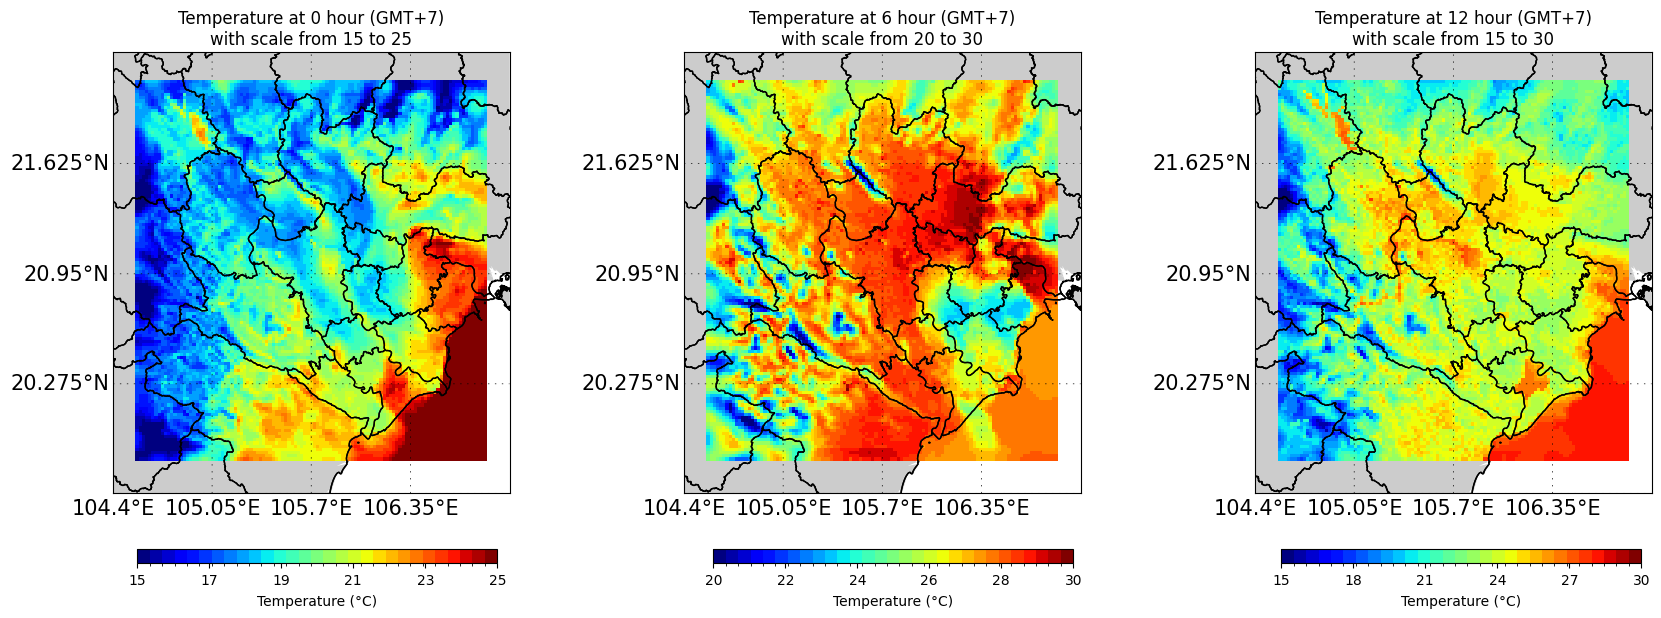

In [8]:
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib.colors import BoundaryNorm

fig, ax = plt.subplots(1, 3, figsize=(20, 7))  # Increased width for more space

# Basemap settings
lon_min = 104.4
lon_max = 107
lat_min = 19.6
lat_max = 22.3

map_1 = Basemap(projection='merc', llcrnrlon=lon_min, llcrnrlat=lat_min,
    urcrnrlon=lon_max, urcrnrlat=lat_max, resolution='i', ax=ax[0])

map_2 = Basemap(projection='merc', llcrnrlon=lon_min, llcrnrlat=lat_min,
    urcrnrlon=lon_max, urcrnrlat=lat_max, resolution='i', ax=ax[1])

map_3 = Basemap(projection='merc', llcrnrlon=lon_min, llcrnrlat=lat_min,
    urcrnrlon=lon_max, urcrnrlat=lat_max, resolution='i', ax=ax[2])

# Fill continents and read shapefiles
for map_instance in [map_1, map_2, map_3]:
    map_instance.fillcontinents(zorder=0)
    map_instance.readshapefile('gadm41_VNM/gadm41_VNM_0', 'gadm41_VNM_0', linewidth=1, color='black')
    map_instance.readshapefile('gadm41_VNM/gadm41_VNM_1', 'gadm41_VNM_1', linewidth=1, color='black')

# Draw latitudes and longitudes
# parallels = np.arange(lat_min, lat_max, (lat_max - lat_min) / 4)
# meridians = np.arange(lon_min, lon_max, (lon_max - lon_min) / 4)
parallels = np.arange(lat_min, lat_max, (lat_max - lat_min) / 4)
meridians = np.arange(lon_min, lon_max, (lon_max - lon_min) / 4)


for map_instance in [map_1, map_2, map_3]:
    map_instance.drawparallels(parallels, linewidth=0.5, dashes=[2, 8], labels=[1, 0, 0, 0], fontsize=15, zorder=12)
    map_instance.drawmeridians(meridians, linewidth=0.5, dashes=[2, 8], labels=[0, 0, 0, 1], fontsize=15, zorder=12)

# Define temperature ranges and normalization
levels_1 = np.linspace(15, 25, 30, endpoint=True)
levels_2 = np.linspace(20, 30, 30, endpoint=True)
levels_3 = np.linspace(15, 30, 30, endpoint=True)
color_map = plt.get_cmap('jet')
color_map.set_bad(color='white')

norm_1 = BoundaryNorm(levels_1, ncolors=color_map.N, clip=False)
norm_2 = BoundaryNorm(levels_2, ncolors=color_map.N, clip=False)
norm_3 = BoundaryNorm(levels_3, ncolors=color_map.N, clip=False)

# pcolormesh for each map
data_values = [data[0, :, :] - 273.15, data[6, :, :] - 273.15, data[12, :, :] - 273.15]  # Ensure 'data' is defined

cm_1 = map_1.pcolormesh(lon_map, lat_map, data_values[0], norm=norm_1, cmap=color_map)
cm_2 = map_2.pcolormesh(lon_map, lat_map, data_values[1], norm=norm_2, cmap=color_map)
cm_3 = map_3.pcolormesh(lon_map, lat_map, data_values[2], norm=norm_3, cmap=color_map)

# Create color bars
cbar_ax1 = fig.add_axes([0.14, 0.15, 0.18, 0.02])  # Adjust position
cbar_ax2 = fig.add_axes([0.428, 0.15, 0.18, 0.02])
cbar_ax3 = fig.add_axes([0.712, 0.15, 0.18, 0.02])

cbar1 = plt.colorbar(cm_1, cax=cbar_ax1, orientation='horizontal', ticks=np.linspace(15, 25, 6))
cbar1.set_label('Temperature (°C)', rotation=0, labelpad=5)

cbar2 = plt.colorbar(cm_2, cax=cbar_ax2, orientation='horizontal', ticks=np.linspace(20, 30, 6))
cbar2.set_label('Temperature (°C)', rotation=0, labelpad=5)

cbar3 = plt.colorbar(cm_3, cax=cbar_ax3, orientation='horizontal', ticks=np.linspace(15, 30, 6))
cbar3.set_label('Temperature (°C)', rotation=0, labelpad=5)

# Add titles to each plot
ax[0].title.set_text('Temperature at 0 hour (GMT+7)\nwith scale from 15 to 25')
ax[1].title.set_text('Temperature at 6 hour (GMT+7)\nwith scale from 20 to 30')
ax[2].title.set_text('Temperature at 12 hour (GMT+7)\nwith scale from 15 to 30')

# Adjust layout to avoid overlap
plt.subplots_adjust(bottom=0.25, wspace=0.4)  # Adjust bottom margin and width space

# Show the plot
plt.show()


---------------------------
EX5 (plus): same as EX4 but highlight Hanoi area only
---------------------------
![](https://i.imgur.com/8RjRdp8.png)


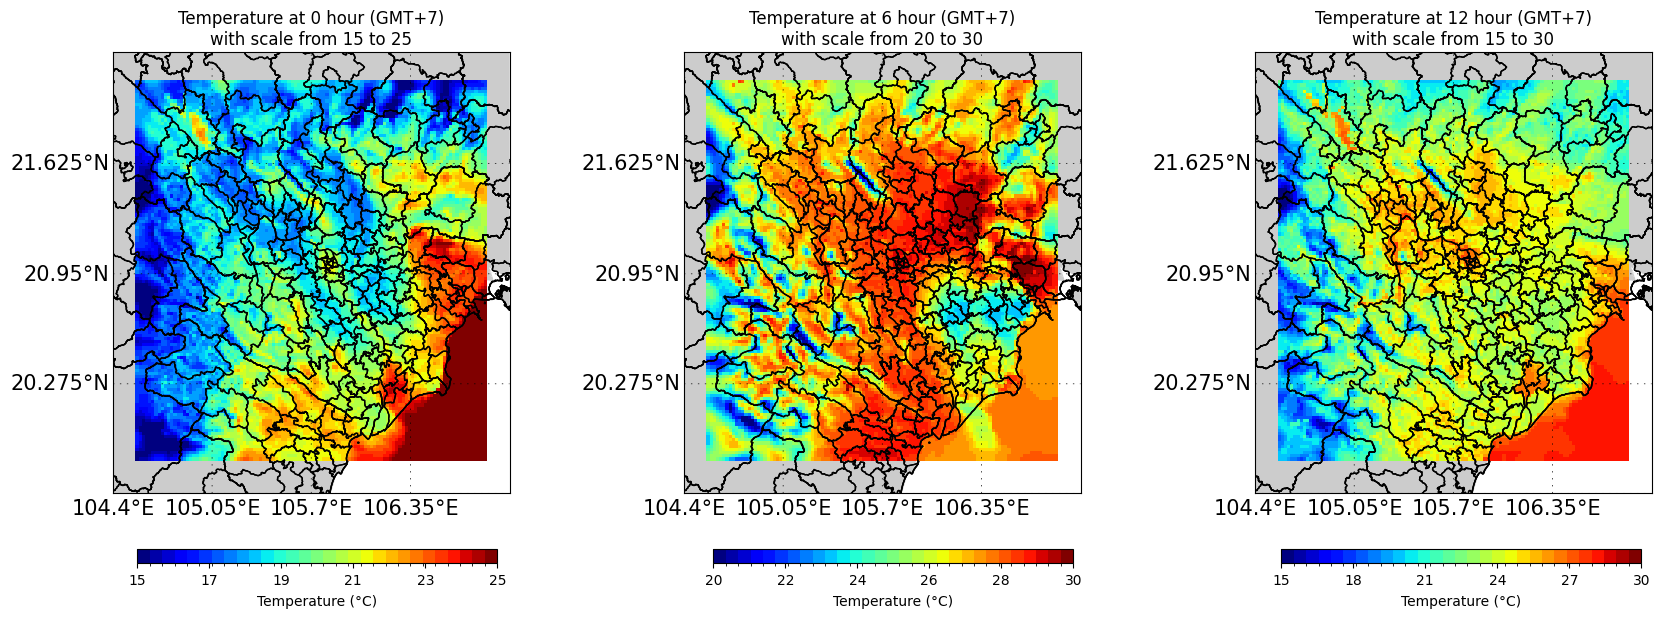

In [9]:
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib.colors import BoundaryNorm

# Create figure and axes
fig, ax = plt.subplots(1, 3, figsize=(20, 7))  # Increased width for more space

# Basemap settings
lon_min = 104.4
lon_max = 107
lat_min = 19.6
lat_max = 22.3

# Create Basemap instances
map_1 = Basemap(projection='merc', llcrnrlon=lon_min, llcrnrlat=lat_min,
    urcrnrlon=lon_max, urcrnrlat=lat_max, resolution='i', ax=ax[0])
map_2 = Basemap(projection='merc', llcrnrlon=lon_min, llcrnrlat=lat_min,
    urcrnrlon=lon_max, urcrnrlat=lat_max, resolution='i', ax=ax[1])
map_3 = Basemap(projection='merc', llcrnrlon=lon_min, llcrnrlat=lat_min,
    urcrnrlon=lon_max, urcrnrlat=lat_max, resolution='i', ax=ax[2])

# Fill continents and read shapefiles
for map_instance in [map_1, map_2, map_3]:
    map_instance.fillcontinents(zorder=0)
    map_instance.readshapefile('gadm41_VNM/gadm41_VNM_0', 'gadm41_VNM_0', linewidth=1, color='black')
    map_instance.readshapefile('gadm41_VNM/gadm41_VNM_1', 'gadm41_VNM_1', linewidth=1, color='black')
    map_instance.readshapefile('gadm41_VNM/gadm41_VNM_2', 'gadm41_VNM_2', linewidth=1, color='black')

# Highlight Hanoi
for map_instance in [map_1, map_2, map_3]:
    for info, shape in zip(map_instance.gadm41_VNM_2_info, map_instance.gadm41_VNM_2):
        if info['NAME_2'] == 'Hà Nội':  # Ensure the correct name based on the shapefile
            x, y = zip(*shape)  # Get the x and y coordinates of the shape
            map_instance.plot(x, y, linewidth=3, color='red')  # Highlight with a bold red line

# Draw latitudes and longitudes
parallels = np.arange(lat_min, lat_max, (lat_max - lat_min) / 4)
meridians = np.arange(lon_min, lon_max, (lon_max - lon_min) / 4)

for map_instance in [map_1, map_2, map_3]:
    map_instance.drawparallels(parallels, linewidth=0.5, dashes=[2, 8], labels=[1, 0, 0, 0], fontsize=15, zorder=12)
    map_instance.drawmeridians(meridians, linewidth=0.5, dashes=[2, 8], labels=[0, 0, 0, 1], fontsize=15, zorder=12)

# Define temperature ranges and normalization
levels_1 = np.linspace(15, 25, 30, endpoint=True)
levels_2 = np.linspace(20, 30, 30, endpoint=True)
levels_3 = np.linspace(15, 30, 30, endpoint=True)
color_map = plt.get_cmap('jet')
color_map.set_bad(color='white')

norm_1 = BoundaryNorm(levels_1, ncolors=color_map.N, clip=False)
norm_2 = BoundaryNorm(levels_2, ncolors=color_map.N, clip=False)
norm_3 = BoundaryNorm(levels_3, ncolors=color_map.N, clip=False)

# Assuming 'data' is defined and structured correctly
data_values = [data[0, :, :] - 273.15, data[6, :, :] - 273.15, data[12, :, :] - 273.15]

# pcolormesh for each map
lon_map, lat_map = map_1(lon, lat)
cm_1 = map_1.pcolormesh(lon_map, lat_map, data_values[0], norm=norm_1, cmap=color_map)

lon_map, lat_map = map_2(lon, lat)
cm_2 = map_2.pcolormesh(lon_map, lat_map, data_values[1], norm=norm_2, cmap=color_map)

lon_map, lat_map = map_3(lon, lat)
cm_3 = map_3.pcolormesh(lon_map, lat_map, data_values[2], norm=norm_3, cmap=color_map)

# Create color bars
cbar_ax1 = fig.add_axes([0.14, 0.15, 0.18, 0.02])  # Adjust position
cbar_ax2 = fig.add_axes([0.428, 0.15, 0.18, 0.02])
cbar_ax3 = fig.add_axes([0.712, 0.15, 0.18, 0.02])

cbar1 = plt.colorbar(cm_1, cax=cbar_ax1, orientation='horizontal', ticks=np.linspace(15, 25, 6))
cbar1.set_label('Temperature (°C)', rotation=0, labelpad=5)

cbar2 = plt.colorbar(cm_2, cax=cbar_ax2, orientation='horizontal', ticks=np.linspace(20, 30, 6))
cbar2.set_label('Temperature (°C)', rotation=0, labelpad=5)

cbar3 = plt.colorbar(cm_3, cax=cbar_ax3, orientation='horizontal', ticks=np.linspace(15, 30, 6))
cbar3.set_label('Temperature (°C)', rotation=0, labelpad=5)

# Add titles to each plot
ax[0].title.set_text('Temperature at 0 hour (GMT+7)\nwith scale from 15 to 25')
ax[1].title.set_text('Temperature at 6 hour (GMT+7)\nwith scale from 20 to 30')
ax[2].title.set_text('Temperature at 12 hour (GMT+7)\nwith scale from 15 to 30')

# Adjust layout to avoid overlap
plt.subplots_adjust(bottom=0.25, wspace=0.4)

# Show the plot
plt.show()
